In [68]:
import pandas as pd

In [69]:
thietbi = pd.read_csv('thietbi.csv')
nguoidung_thietbi = pd.read_csv('nguoidung_thietbi.csv')
nguoidung_sudung = pd.read_csv('nguoidung_sudung.csv')

In [70]:
# Đổi tên các cột dữ liệu cần thiết
thietbi.rename(columns={'Retail Branding': 'Branding',
                        'Marketing Name': 'MarketingName'}, inplace=True)

In [71]:
thietbi.head()

,Branding,MarketingName,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [72]:
# Trộn bảng nguoidung_sudung và nguoidung_thietbi thông qua inner join để được bảng 
# kết quả có các cột sau: [outgoing_mins_per_month, outgoing_sms_per_month, 
# monthly_mb, use_id, platform, device] 
 
dfKetQua = pd.merge(nguoidung_sudung, nguoidung_thietbi[['use_id', 'platform', 'device']], on='use_id')

dfKetQua.head(20)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F
5,71.59,79.26,1557.33,22793,android,SM-G361F
6,71.59,79.26,519.12,22794,android,SM-G361F
7,71.59,79.26,519.12,22795,android,SM-G361F
8,30.92,22.77,3114.67,22799,android,ONEPLUS A3003
9,69.80,14.70,25955.55,22801,android,GT-I9505


In [73]:
thietbi.head(20)

,Branding,MarketingName,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
5,7Eleven,IN265,IN265,IN265
6,A.O.I. ELECTRONICS FACTORY,A.O.I.,TR10CS1_11,TR10CS1
7,AG Mobile,AG BOOST 2,BOOST2,E4010
8,AG Mobile,AG Flair,AG_Flair,Flair
9,AG Mobile,AG Go Tab Access 2,AG_Go_Tab_Access_2,AG_Go_Tab_Access_2


In [74]:
# Tiếp tục inner-join bảng thietbi và dfKetQua để có thêm 2 cột Model và Branding trong 
# bảng kết quả cuối cùng. Lưu ý ở đây khóa liên kết sẽ khác tên
dfKetQua = pd.merge(dfKetQua, thietbi[['Branding', 'Model']],
                    left_on='device',
                    right_on='Model')

# Hãy liệt kê 5 dòng đầu tiên các mẫu thiết bị (cột device) bắt đầu bằng GT
dfKetQua.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,Samsung,SM-G361F


In [75]:
# Hãy thống kê trung bình số phút hàng tháng, trung bình sms và trung bình data, số lượng 
# sử dụng của các nhãn hàng 
dfKetQua.groupby('Branding').agg({
    'outgoing_mins_per_month': 'mean',
    'outgoing_sms_per_month': 'mean',
    'monthly_mb': 'mean',
    'use_id': 'count'
})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

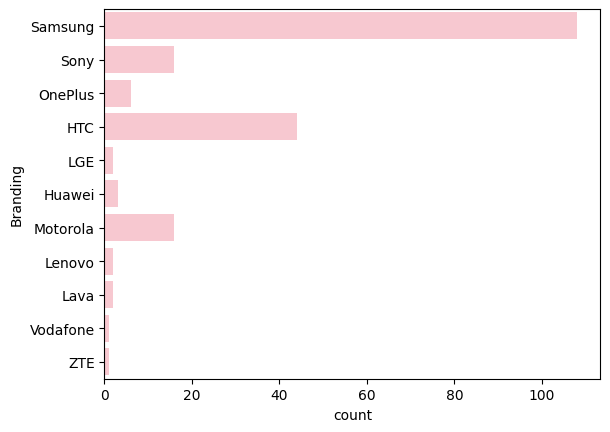

In [77]:
# Trực quan số lượng người dùng các nhãn hàng
sns.countplot(y='Branding', data=dfKetQua, color='pink')
plt.show()

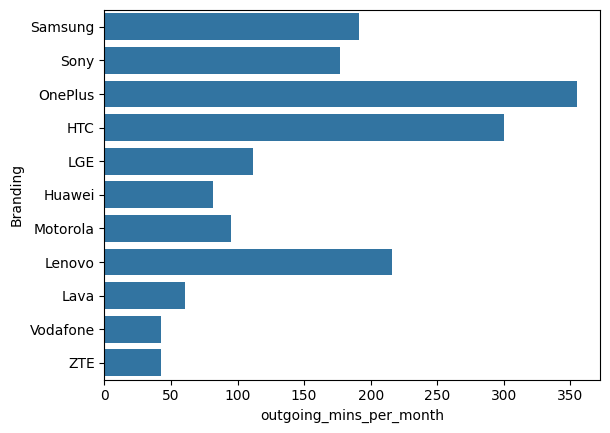

In [78]:
# Trực quan hóa dữ liệu trung bình phút gọi, trung bình sms và dung lượng sử dụng trên 
# từng nhóm nhãn hàng bán lẻ 

import numpy as np
sns.barplot(dfKetQua, x='outgoing_mins_per_month', y='Branding', errorbar=None)
plt.show()

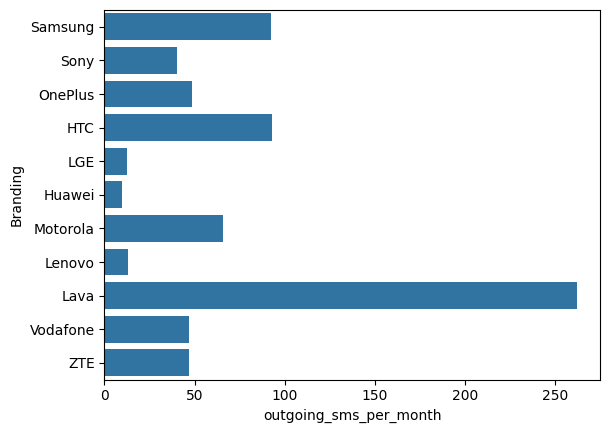

In [79]:
sns.barplot(dfKetQua, x='outgoing_sms_per_month', y='Branding', errorbar=None)
plt.show()

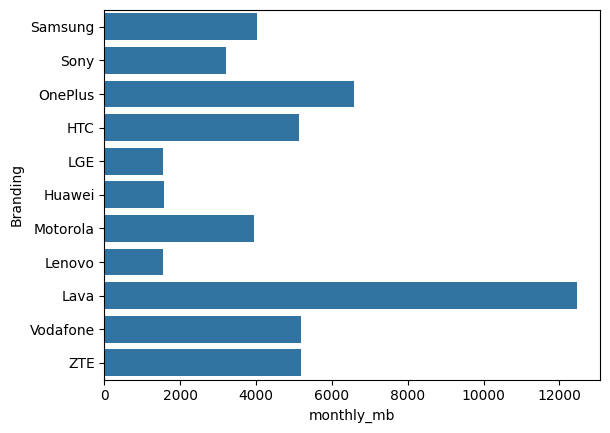

In [80]:
sns.barplot(dfKetQua, x='monthly_mb', y='Branding', errorbar=None)
plt.show()

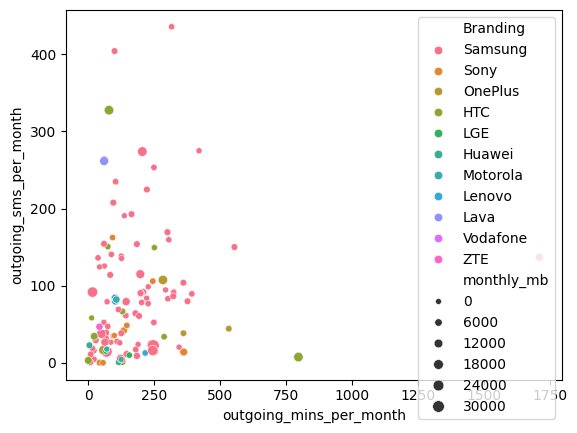

In [81]:
# Khảo sát tương quan giữa phút gọi, sms và dung lượng trên từng nhóm nhãn hàng
sns.scatterplot(data=dfKetQua, x='outgoing_mins_per_month',
                    y='outgoing_sms_per_month', hue='Branding', size='monthly_mb')
                    
plt.show()

In [82]:

import scipy.stats as stats

In [83]:
# 11.  Hãy kiểm định xem trung bình outgoing_mins_per_month có bằng 200 phút
stats.ttest_1samp(dfKetQua['outgoing_mins_per_month'], popmean=200)

TtestResult(statistic=np.float64(0.3678324474067915), pvalue=np.float64(0.7133871524810331), df=np.int64(200))

trung bình outgoing_mins_per_month không bằng 200 phút

In [84]:
# 12.  Hãy kiểm định xem trung bình outgoing_sms_per_month có bằng 100 tin nhắn
stats.ttest_1samp(dfKetQua['outgoing_sms_per_month'], popmean=100)

TtestResult(statistic=np.float64(-2.9567085781961198), pvalue=np.float64(0.003483493850205251), df=np.int64(200))

trung bình outgoing_sms_per_month có bằng 100 tin nhắn

In [85]:
# 13.  Hãy kiểm định xem trung bình monthly_mb có bằng 2048 mb
stats.ttest_1samp(dfKetQua['monthly_mb'], popmean=2048)

TtestResult(statistic=np.float64(5.918078326415772), pvalue=np.float64(1.3950238813156428e-08), df=np.int64(200))

trung bình monthly_mb không bằng 2048 mb

In [86]:
from statsmodels.stats.weightstats import ztest as ztest

In [87]:
from scipy.stats.stats import pearsonr

C:\Users\T14\AppData\Local\Temp\ipykernel_9016\4005289447.py:1: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [88]:
# Hãy tạo ma trận tương quan giữa [outgoing_mins_per_month, outgoing_sms_per_month, 
# monthly_mb] và sắp xếp tăng dần về mức độ tương quan

dfKetQua[["outgoing_mins_per_month", "outgoing_sms_per_month", "monthly_mb"]].corr()


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
outgoing_mins_per_month,1.000000,-0.016494,0.213489
outgoing_sms_per_month,-0.016494,1.000000,-0.046049
monthly_mb,0.213489,-0.046049,1.000000


In [89]:
# 15.  Kiểm định xem outgoing_mins_per_month, outgoing_sms_per_month có tương quan
pearsonr(dfKetQua['outgoing_mins_per_month'], dfKetQua['outgoing_sms_per_month'])

PearsonRResult(statistic=np.float64(-0.01649444168531939), pvalue=np.float64(0.8162223636414785))

outgoing_mins_per_month, outgoing_sms_per_month có tương quan

In [90]:
from scipy.stats import chi2_contingency

In [91]:
# 16. Hãy kiểm định xem có mối quan hệ nào giữa platform và branding
crossdata = pd.crosstab(dfKetQua['platform'], dfKetQua['Branding'], rownames=['platform'], colnames=['Branding'])

crossdata

Branding,HTC,Huawei,LGE,Lava,Lenovo,Motorola,OnePlus,Samsung,Sony,Vodafone,ZTE
platform,,,,,,,,,,,
android,44,3,2,2,2,16,6,108,16,1,1


In [92]:
stat, p, dof, expected = chi2_contingency(crossdata)
 
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


platform và branding độc lập với nhau

In [93]:
# 17. Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform
crossdata2 = pd.crosstab(dfKetQua['platform'], dfKetQua['monthly_mb'], rownames=['platform'], colnames=['monthly_mb'])

crossdata2

monthly_mb,0.00,11.68,33.79,74.40,212.64,407.01,519.12,803.24,894.58,1038.21,...,9005.49,9344.00,10158.50,10382.21,12458.67,15573.33,16611.55,20764.45,25955.55,31146.67
platform,,,,,,,,,,,,,,,,,,,,,
android,1,1,2,1,4,1,30,1,2,8,...,1,1,1,1,4,13,1,4,1,1


In [94]:
stat, p, dof, expected = chi2_contingency(crossdata2)
 
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


monthly_mb và platform độc lập với nhau

In [99]:

# 18. Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform theo loại branding
crossdata3 = pd.crosstab(dfKetQua['Branding'], [dfKetQua['platform'], dfKetQua['monthly_mb']], margins=True)

In [100]:

stat, p, dof, expected = chi2_contingency(crossdata3)
 
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.4038247803168535e-11
Dependent (reject H0)


giữa monthly_mb và platform theo loại branding phụ thuộc với nhau

In [102]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [104]:
# 19. Phân tích sự ảnh hưởng của outgoing_mins_per_month, outgoing_sms_per_month đến
# monthly_mb dựa trên mô hình hồi quy tuyến tính

X_with_constant = sm.add_constant(dfKetQua[["outgoing_mins_per_month","outgoing_sms_per_month"]].values)
y = dfKetQua[['monthly_mb']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.925
Date:                Sat, 07 Sep 2024   Prob (F-statistic):            0.00818
Time:                        22:12:24   Log-Likelihood:                -2005.3
No. Observations:                 201   AIC:                             4017.
Df Residuals:                     198   BIC:                             4027.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3513.0441    631.350      5.564      0.0

In [115]:
# Lấy các hệ số hồi quy
coefficients = result.params
# In ra các hệ số
print(coefficients[0])

3513.044099627888


In [116]:
# 20. Dựa trên mô hình hồi quy tuyến tính hãy cho biết nếu outgoing_mins_per_month,
# outgoing_sms_per_month lần lượt là 50 phút, 75 tin nhắn thì tháng đó người dùng sẽ tiêu
# hao bao nhiêu dung lượng internet (mb) cho quá trình sử dụng.
# (*) Lưu ý: Sinh viên xây dựng chương trình phần mềm hoàn chỉnh dạng Console
# Application với Input là outgoing_mins_per_month, outgoing_sms_per_month và output
# là giá trị monthly_mb dự báo được.
intercept = coefficients[0]
coef_outgoing_mins = coefficients[1]
coef_outgoing_sms = coefficients[2]

def predict_monthly_mb(outgoing_mins_per_month, outgoing_sms_per_month):
    monthly_mb = intercept + coef_outgoing_mins * outgoing_mins_per_month + coef_outgoing_sms * outgoing_sms_per_month
    return monthly_mb

# Nhập liệu người dùng
outgoing_mins_per_month = float(input('Nhập số phút: '))
outgoing_sms_per_month = float(input('Nhập số tin nhắn: '))

# Dự đoán và in kết quả
predicted_mb = predict_monthly_mb(outgoing_mins_per_month, outgoing_sms_per_month)
print('Kết quả dự đoán: ', predicted_mb, "MB")

Kết quả dự đoán:  3543.199128277426 MB
